# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

C:\Users\I822363\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\I822363\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = [
              'alt.atheism', 
              'talk.religion.misc', 
              'comp.graphics',
              'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', remove=(
                                      'headers', 'footers', 
                                              'quotes'
                                             ),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=(
                                    'headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
int_num_test = int(num_test/2)
test_data, test_labels = newsgroups_test.data[int_num_test:], newsgroups_test.target[int_num_test:]
dev_data, dev_labels = newsgroups_test.data[:int_num_test], newsgroups_test.target[:int_num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print ('training label shape:', train_labels.shape)
print ('test label shape:', test_labels.shape)
print ('dev label shape:', dev_labels.shape)
print ('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


## (1) For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
def P1(num_examples=5):
### STUDENT START ###
    for lv_counter in range(num_examples):
        print("\n\n",train_data[lv_counter], "\ntraining label : ", train_labels[lv_counter])

### STUDENT END ###
P1()




 Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 
training label :  1


 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries. 
training label :  3


 
 >In arti

## (2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform"). The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

In [4]:
def P2(corpus):
### STUDENT START ###
    vectorizer = CountVectorizer(stop_words = 'english')
    X = vectorizer.fit_transform(corpus)
    return vectorizer, X 
### STUDENT END ###

vectorizer, X = P2(train_data)
X.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

In [5]:
from scipy.sparse import csr_matrix

# Vocabulary size
print('Vocabulary size: ', X.shape[1])

# average no of features that are non zero per example
print('Average no of features that are non zero: %d per example' % round(X.getnnz()/X.shape[0]))

# fraction of matrix entries that are non-zero
print('Fraction of matrix entries that are non-zero %.3f' % (100 * X.getnnz()/np.prod(X.shape)), '%')


Vocabulary size:  26576
Average no of features that are non zero: 66 per example
Fraction of matrix entries that are non-zero 0.247 %


> **_W/o removing headers, footers and quotes: On an average, there are 97 non-zero features per sample and 0.36% of entries that are non-zero!_**

> **_With removing headers, footers and quotes: On an average, there are 132 non-zero features per sample, which is 0.42% of entries that are non-zero!_**

### b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

In [6]:
analyze = vectorizer.build_analyzer()
print('0th feature name:',vectorizer.get_feature_names()[0])
print('last feature name:',vectorizer.get_feature_names()[-1])

0th feature name: 00
last feature name: zyxel


### c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?


In [7]:
vectorizer_w_vocab = CountVectorizer(
    vocabulary = ["atheism", "graphics", "space", "religion"])
corpus = train_data
X2 = vectorizer_w_vocab.fit_transform(corpus)
#analyze2 = vectorizer_w_vocab.build_analyzer()

print('feature name:',vectorizer_w_vocab.get_feature_names())
print(
 'Training vector shape no of rows: %d , no of features %d' % (
  X2.shape)
     )

# Total entries that are non zero
print('Total non-zero entries: ',X2.getnnz())

# average no of features that are non zero per example
print('average no of features that are non zero per example: ',round(
    X2.getnnz()/X2.shape[0],2))

X2.toarray()

feature name: ['atheism', 'graphics', 'space', 'religion']
Training vector shape no of rows: 2034 , no of features 4
Total non-zero entries:  546
average no of features that are non zero per example:  0.27


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ..., 
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int64)

> **_0.27 out of 4 features is 6.75%. Roughly 6.75% of the features is non zero_**

### d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?


In [8]:
ngram_vectorizer = CountVectorizer(ngram_range=(2,3),
#                       token_pattern=r'\b\w+\b', 
                       min_df=1)
X_3 = ngram_vectorizer.fit_transform(corpus).toarray()
print(
'Vocabulary shape for bigram and trigram features: (%d, %d)' % X_3.shape)
print('Vocabulary size: ', X_3.shape[1])

# print first 100 bigram and trigram features
print('Some Example features: \n',ngram_vectorizer.get_feature_names()[:20])


Vocabulary shape for bigram and trigram features: (2034, 510583)
Vocabulary size:  510583
Some Example features: 
 ['00 10', '00 10 followed', '00 10 opening', '00 12', '00 12 00', '00 13', '00 13 phone', '00 21', '00 21 pdt', '00 22', '00 22 fax', '00 30', '00 30 afternoon', '00 30 lunch', '00 47', '00 47 apr', '00 50', '00 50 worth', '00 52', '00 52 01']


### e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

In [9]:
vectorizer = CountVectorizer(min_df=10)
corpus = train_data
X = vectorizer.fit_transform(corpus)
print('Vocabulary shape w min_df = 10:', X.shape[1]) 


Vocabulary shape w min_df = 10: 3064


### f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [10]:
dev_vectorizer = CountVectorizer()
dev_X = dev_vectorizer.fit_transform(dev_data)
print('Dev dimension (%d, %d)'% dev_X.shape)

train_vectorizer = CountVectorizer()
train_X = train_vectorizer.fit_transform(train_data)
print('Train dimension (%d, %d)' % train_X.shape)

dev_features = dev_vectorizer.get_feature_names()
train_features = train_vectorizer.get_feature_names()

# Dev features that are not in train data
print('\n\n # words in dev missing in train ')
len(list(set(dev_features) - set(train_features)))



Dev dimension (676, 16246)
Train dimension (2034, 26879)


 # words in dev missing in train 


4027

## (3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

In [11]:
from time import time

print('data loaded')

# order of labels in `target_names` can be different from `categories`
target_names = newsgroups_train.target_names

def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 1e6

train_data_size_mb = size_mb(train_data)
dev_data_size_mb = size_mb(dev_data)

print("%d documents - %0.3fMB (training set)" % (
    len(train_data), train_data_size_mb))
print("%d documents - %0.3fMB (test set)" % (
    len(dev_data), dev_data_size_mb))
print("%d categories" % len(categories))
print()


print("Extracting features from the training data using a sparse vectorizer")
t0 = time()

vectorizer = CountVectorizer( 
                              max_df=0.5, 
                              stop_words = 'english'
                              )
X_train = vectorizer.fit_transform(train_data)
y_train = train_labels
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, train_data_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)
print()


print("Extracting features from the test data using the same vectorizer")
t0 = time()
X_dev = vectorizer.transform(dev_data)
y_dev = dev_labels
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, dev_data_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_dev.shape)
print()




data loaded
2034 documents - 2.428MB (training set)
676 documents - 1.013MB (test set)
4 categories

Extracting features from the training data using a sparse vectorizer
done in 0.519449s at 4.674MB/s
n_samples: 2034, n_features: 26576

Extracting features from the test data using the same vectorizer
done in 0.162122s at 6.247MB/s
n_samples: 676, n_features: 26576



KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') 
best parameters: {'n_neighbors': 90, 'weights': 'distance'}
best cross validation score: 0.437 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 
best parameters: {'alpha': 0.10000000000000001}
best cross validation score: 0.840 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 
best parameters: {'C': 0.10000000000000001}
best cross validation score: 0.816 

Results of grid search on train data seen in the above charts


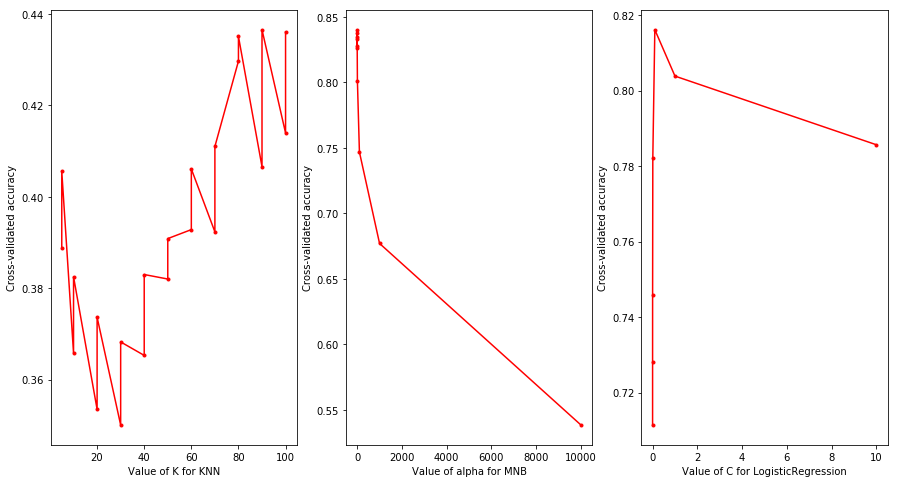

In [12]:
def gridSearch(
                clf, parameters, plot_x_axis_text, x_range,
                X_train = X_train,
                y_train = y_train,
                X_dev   = X_dev,
                y_dev   = y_dev,
                locl_plot = 'N'
               ):
    grid = GridSearchCV(clf, parameters, cv=10)
    grid.fit(X_train, y_train)
    print(clf, "\nbest parameters:", grid.best_params_)
    print("best cross validation score: %.3f \n" % grid.best_score_)
    grid.score(X_dev, y_dev)
    grid_mean_scores = [
        result.mean_validation_score for result in grid.grid_scores_]
    if locl_plot == 'Y':
        fig = plt.figure(figsize = (5,4))
        plt.plot(x_range, grid_mean_scores)
        plt.xlabel(plot_x_axis_text)
        plt.ylabel('Cross-Validated Accuracy')
        
    return grid, grid_mean_scores

def custom_plot(
    ax, x_range, grid_mean_scores, plot_x_axis_text):
    ax.plot(x_range, grid_mean_scores, 'r.-')
    ax.set_xlabel(plot_x_axis_text)
    ax.set_ylabel('Cross-validated accuracy')
    
########## Perform kNN ###########################
knn = KNeighborsClassifier(algorithm = 'brute')
parameters = [{'weights': [
    'uniform', 'distance'], 'n_neighbors': [
        5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]
k_range = [
    5,5,10,10,20,20,30,30,40,40,
    50,50,60,60,70,70,80,80,90,90,100,100]
grid_kNN, gms_kNN = gridSearch(
    knn, parameters, "Value of K for KNN", k_range)
# Plot the data
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,3,1)
custom_plot(ax1, k_range, gms_kNN,"Value of K for KNN" )
################ end of kNN ######################

########## Perform Multinomial Naive bayes #######
MNB = MultinomialNB()
parameter_MNB = {'alpha': 10. ** np.arange(-5,5)}
alpha_range = 10. ** np.arange(-5,5)
grid_MNB, gms_MNB = gridSearch(MNB, parameter_MNB, "Value of alpha for MNB", alpha_range)
# plot the data
ax2 = fig.add_subplot(1,3,2)
custom_plot(ax2, alpha_range, gms_MNB,"Value of alpha for MNB" )
################ end of MNB ######################

########## Perform Logistic Regression############
LR = LogisticRegression()
parameter_LR = {'C': 10. ** np.arange(-5,2)}
C_range = 10. ** np.arange(-5,2)
grid_LR,gms_LR = gridSearch(
    LR, parameter_LR, "Value of C for LogisticRegression", C_range)
# plot the data
ax3 = fig.add_subplot(1,3,3)
custom_plot(ax3, C_range, gms_LR,"Value of C for LogisticRegression" )
########## End of Logistic Regression#############

print("Results of grid search on train data seen in the above charts")

### a. Why doesn't nearest neighbors work well for this problem?
Because the vectorizers are all sparse, and that the number of non zero features is less than 1% when the vocabulary size is 30,000 words, and that kNN suffers from the curse of high dimensionality, kNN does not work well. Please observe the not very high accuracy from both outputs above and below. 

### b. Any ideas why logistic regression doesn't work as well as Naive Bayes?
Clearly in the test results below, one can observe a roughly 5% drop in the Logistics Regression's accuracy compared to that of MNB. Logistic Regression is a discriminative classifier whereas Naive Bayes is a generative classifier. The below paper https://www.cs.cmu.edu/~tom/mlbook/NBayesLogReg.pdf in section 4 states that MNB classifiers converge to their asymptomatic accuracies when the no of training examples is closer to Log n where n is the number of features, whereas Logistic regression classifier reaches its aymptomatic accuracy when the number of examples is closer to n. With the training examples around 2000 and the number of features significantly exceeding 2000 (26576 to be precise) in this dataset, it is expected that MNB classifiers work well than their Logistic Regression counterparts.


In [13]:
import sys
from sklearn.utils.extmath import density
import logging


# mapping from integer feature name to original token string
feature_names = vectorizer.get_feature_names()

if feature_names:
    feature_names = np.asarray(feature_names)


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

# #############################################################################
# Benchmark classifiers
def benchmark(clf, 
              ipts_print_report='', ipts_print_cm='', ipts_print_top10='Y',
              X_train = X_train,
              y_train = y_train,
              X_dev   = X_dev,
              y_dev   = y_dev,
              features = feature_names
              ):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_dev)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_dev, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if ipts_print_top10 == 'Y' and features is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(np.abs(clf.coef_[i]))[-10:]
                print(trim("%s: %s" % (label, " ".join(features[top10]))))
        print()

    if ipts_print_report:
        print("classification report:")
        print(metrics.classification_report(y_dev, pred,
                                            target_names=target_names))

    if ipts_print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_dev, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

# P3 carries out 3 classifications based on the best grid
# search parameters
def P3():
    results = []
    for clf, name in (
            (KNeighborsClassifier(**grid_kNN.best_params_), "kNN"),
            (MultinomialNB(**grid_MNB.best_params_), "MultinomialNB"),
            (LogisticRegression(**grid_LR.best_params_), 'LogisticReg')
            ):
        print('=' * 80)
        print(name)
        results.append(benchmark(clf, ipts_print_report='Y'))

results = []
results = P3()



kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=90, p=2,
           weights='distance')
train time: 0.002s
test time:  0.073s
accuracy:   0.439
classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.77      0.21      0.33       165
     comp.graphics       0.43      0.84      0.57       185
         sci.space       0.73      0.24      0.36       199
talk.religion.misc       0.29      0.46      0.36       127

       avg / total       0.57      0.44      0.41       676


MultinomialNB
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.10000000000000001, class_prior=None, fit_prior=True)
train time: 0.007s
test time:  0.002s
accuracy:   0.788
dimensionality: 26576
density: 1.000000
top 10 keywords pe

### c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [14]:
def P3_c():
    Clist = list(10. ** np.arange(-5,2))
    df = pd.DataFrame(columns=categories)
    df2 = pd.DataFrame(columns=categories)
    for Cs in Clist:
        clf = LogisticRegression(penalty='l2', C=Cs)
        clf.fit(X_train, y_train)
        Crow=[]
        for i, label in enumerate(target_names):
                isum = sum((clf.coef_[i])**2)
                Crow.append(isum)
                #print('C=' + str(Cs) + ' ' + label , isum)
                
        df2 = pd.DataFrame([Crow], columns=categories)        
        df = df.append(df2, ignore_index=True)
    return df, df2
df_cs , df2= P3_c()
df_cs


,alt.atheism,talk.religion.misc,comp.graphics,sci.space
0,0.000135,0.000184,0.000150,0.000151
1,0.005569,0.008254,0.006973,0.006036
2,0.149749,0.196074,0.179368,0.152102
3,2.580498,3.098741,2.876045,2.228774
4,28.462529,26.934127,28.432217,24.391891
5,180.062359,148.678938,170.494938,163.482823
6,673.818543,542.001983,612.864848,627.602036


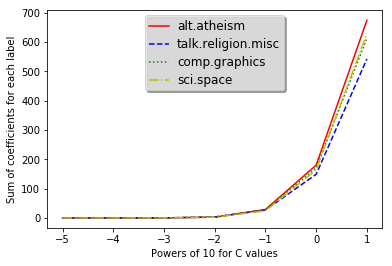

In [15]:
fig, ax = plt.subplots()
ax.plot(df_cs.index.values - 5, df_cs[categories[0]], 'r-', label = categories[0])
ax.plot(df_cs.index.values - 5, df_cs[categories[1]], 'b--', label = categories[1])
ax.plot(df_cs.index.values - 5, df_cs[categories[2]], 'g:', label = categories[2])
ax.plot(df_cs.index.values - 5, df_cs[categories[3]], 'y-.', label = categories[3])
plt.ylabel('Sum of coefficients for each label')
plt.xlabel('Powers of 10 for C values')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper center', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()

## 4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. 
### Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. 



In [16]:
def p4(
                X_train  = X_train,
                y_train  = y_train,
                X_dev    = X_dev,
                y_dev    = y_dev,
                features = feature_names
):
    print("Training vector n_samples: %d n_features: %d" % X_train.shape)
    print("Test vector n_samples: %d n_features: %d" % X_dev.shape)
    results = []
    twenty = []
    clf, name = (
        LogisticRegression(), 
        'LogisticReg with L2 regularization')

    print('=' * 80)
    print(name)
    results.append(benchmark(
                             clf, ipts_print_top10='N',
                             X_train = X_train,
                             y_train = y_train,
                             X_dev = X_dev,
                             y_dev = y_dev,
                             features = features)
                  )
    
    twenty_rows = []
    for i, label in enumerate(target_names):
        top5 = np.argsort(np.abs(clf.coef_[i]))[-5:]
        top5_features = features[top5]
        twenty_rows.extend([(label + ' ' + j) for j in top5_features])
        twenty.extend(j for j in top5)
    
    print('Coefficient shape: ',clf.coef_.shape)
    print('\n')
    return pd.DataFrame(
             data    = clf.coef_[:, twenty].round(decimals=3).T, 
             index   = twenty_rows,  
             columns = target_names  )

label_coef = p4()
label_coef.style.highlight_max(axis=1)

Training vector n_samples: 2034 n_features: 26576
Test vector n_samples: 676 n_features: 26576
LogisticReg with L2 regularization
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
train time: 0.995s
test time:  0.002s
accuracy:   0.734
dimensionality: 26576
density: 1.000000


Coefficient shape:  (4, 26576)




,alt.atheism,comp.graphics,sci.space,talk.religion.misc
alt.atheism bobby,1.021,-0.255,-0.454,-0.534
alt.atheism atheists,1.063,-0.248,-0.342,-0.762
alt.atheism atheism,1.103,-0.493,-0.441,-0.511
alt.atheism deletion,1.117,-0.377,-0.427,-0.59
alt.atheism space,-1.231,-1.257,2.126,-1.286
comp.graphics hi,-0.434,1.132,-0.586,-0.74
comp.graphics file,-0.329,1.232,-0.883,-0.652
comp.graphics space,-1.231,-1.257,2.126,-1.286
comp.graphics image,-0.59,1.338,-0.865,-0.56
comp.graphics graphics,-0.822,1.995,-1.248,-0.88


### Create the table again with bigram features. Any surprising features in this table?

In [17]:
def ngram_p4(
                            ip_train_data = train_data, 
                            ip_dev_data   = dev_data
                           ):
    cv = CountVectorizer(ngram_range=(2,2), max_df=0.5, stop_words='english')
    X_train_bigram = cv.fit_transform(ip_train_data)
    y_train_bigram = train_labels

    X_dev_bigram = cv.transform(ip_dev_data)
    y_dev_bigram = dev_labels

   # mapping from integer feature name to original token string
    feature_names_bigram = cv.get_feature_names()

    if feature_names_bigram:
        feature_names_bigram = np.asarray(feature_names_bigram)

   # Perform logistic regression classification
    label_coef = p4(
            X_train_bigram, y_train_bigram, 
            X_dev_bigram, y_dev_bigram, 
            feature_names_bigram
                  )
    return label_coef
    


In [18]:
#label_coef = pd.DataFrame()
label_coef = ngram_p4()
label_coef.style.highlight_max(axis=1)


Training vector n_samples: 2034 n_features: 162896
Test vector n_samples: 676 n_features: 162896
LogisticReg with L2 regularization
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
train time: 1.868s
test time:  0.001s
accuracy:   0.593
dimensionality: 162896
density: 1.000000


Coefficient shape:  (4, 162896)




,alt.atheism,comp.graphics,sci.space,talk.religion.misc
alt.atheism cheers kent,0.858,-1.149,-1.1,0.855
alt.atheism did claim,0.865,-0.269,-0.256,-0.19
alt.atheism cheat hillary,0.939,-0.462,-0.44,0.104
alt.atheism thanks advance,-0.949,1.687,-0.765,-0.875
alt.atheism promises broken,1.049,-0.448,-0.431,-0.093
comp.graphics 24 bit,-0.489,0.929,-0.44,-0.44
comp.graphics greatly appreciated,-0.417,0.974,-0.519,-0.397
comp.graphics cheers kent,0.858,-1.149,-1.1,0.855
comp.graphics comp graphics,-0.57,1.366,-0.618,-0.489
comp.graphics thanks advance,-0.949,1.687,-0.765,-0.875


### observations:
Increasing the vectorizer to bigram reduces accuracy. Drop from 73% to 55-60% observed. Surprisingly email signatures such as "Cheers Kent" & "Thanks in advance" are observed as the most deterministic features of multiple labels. As a result talk.religion.misc and sci.space categories don't seem to perform well with the bigram feature set.

## (5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. 

In [19]:
def empty_preprocessor(s):
    x = s
    return x

def better_preprocessor(s):

    ### STUDENT START ###
    # convert to lower case
    x = s

    def func_replwlower(m):
        if len(m.groups()[0]) > 15:
            return ' '
        else:
            return m.groups()[0].lower()

   # The below code first identifies words and converts to lower
   # case. It also looks for characters such as "I" in the 
   # second half and convert to lower
    x = re.sub("([A-Za-z][\W_]+|([A-Za-z].)+)", func_replwlower, x)

   
   # Replace whitespace characters with space
    x = re.sub("[\s]", ' ', x)
    
   # replace numbers with x
    x = re.sub("[0-9]+", 'x', x)

   # replace special characters with space
    x = re.sub("[-:.,\"\(\)'><_\?\\\/\|]", ' ', x)
    
    return x
### STUDENT END ###

def P5_empty():
   # Now count vectorize the processed data
    P5_vectorizer, X_proc_train_data = P2(train_data)
    X_proc_dev_data = P5_vectorizer.transform(dev_data)
   
    label_coef = p4(X_train = X_proc_train_data, 
                    X_dev   = X_proc_dev_data)
    return label_coef
    
def P5_better():
### STUDENT START ###

   # Preprocess the training and dev data, and then call P4 for 
   # logistic reg..

    proc_train_data = train_data
    proc_dev_data   = dev_data
    for i in range(len(train_data)):
        proc_train_data[i] = better_preprocessor(train_data[i])
    for i in range(len(dev_data)):
        proc_dev_data[i]   = better_preprocessor(dev_data[i])

   # Now count vectorize the processed data
    P5_vectorizer, X_proc_train_data = P2(proc_train_data)
    X_proc_dev_data = P5_vectorizer.transform(proc_dev_data)
   
    label_coef = p4(X_train = X_proc_train_data, 
                    X_dev   = X_proc_dev_data)
    return label_coef
    
    
### STUDENT END ###

label_coef = P5_empty()
label_coef = P5_better()
#label_coef.style.highlight_max(axis=1)

this  is the best   recommendation i have ever received
Training vector n_samples: 2034 n_features: 26576
Test vector n_samples: 676 n_features: 26576
LogisticReg with L2 regularization
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
train time: 1.003s
test time:  0.001s
accuracy:   0.734
dimensionality: 26576
density: 1.000000


Coefficient shape:  (4, 26576)


Training vector n_samples: 2034 n_features: 19887
Test vector n_samples: 676 n_features: 19887
LogisticReg with L2 regularization
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling

(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

In [ ]:
clf1 = LogisticRegression()
Cs=list(np.power(10.0, np.arange(1, 5)))
grid1 = GridSearchCV(clf1, param_grid={'C': Cs, 'penalty': ['l1'],
                'tol': [0.01]}, cv=10)
grid1.fit(X_train, y_train)
clf1 = LogisticRegression(**grid1.best_params_)
clf1.fit(X_train, y_train)
pred = clf1.predict(X_dev)
score = metrics.accuracy_score(y_dev, pred)
print("Test accuracy with L1 regularization:   %0.3f" % score)

clf2 = LogisticRegression()
grid2 = GridSearchCV(clf2, param_grid={'C': Cs, 'penalty': ['l2'],
                'tol': [0.01]}, cv=10)
grid2.fit(X_train, y_train)
clf2 = LogisticRegression(**grid2.best_params_)
clf2.fit(X_train, y_train)
pred = clf2.predict(X_dev)
score = metrics.accuracy_score(y_dev, pred)
print("Test accuracy with L2 regularization:   %0.3f" % score)



Test accuracy with L1 regularization:   0.676
Test accuracy with L2 regularization:   0.657


In [ ]:
def logreg(
           vectorizer = vectorizer,
           param_grid={'C': Cs, 'penalty': ['l1'], 'tol': [0.01]},
           cs=list(np.power(10.0, np.arange(1, 5))),
           cv=10
          ):
    clf = LogisticRegression()
    grid = GridSearchCV(clf, param_grid, cv=10)
    grid.fit(X_train, y_train)
    clf = LogisticRegression(**grid.best_params_)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_dev)
    score = metrics.accuracy_score(y_dev, pred)
    print("Best parameters: ", grid.best_params_)
    print("best cross validation score: %.3f \n" % score)
    
    feature_names = vectorizer.get_feature_names()
    if feature_names:
        feature_names = np.asarray(feature_names)

    clf_df = pd.DataFrame(
             data    = clf.coef_[:, :].round(decimals=3), 
             index   = target_names,  
             columns = feature_names  )    
   
    return clf, clf_df

Cs=list(np.power(10.0, np.arange(1, 5)))
clf1, clf1_df = logreg()
clf2, clf2_df = logreg(param_grid={'C': Cs, 'penalty': ['l2'], 'tol': [0.01]})

Best parameters:  {'C': 10.0, 'penalty': 'l1', 'tol': 0.01}
best cross validation score: 0.641 



Print L1 penalty - coefficients of Logistic Regression. You'll observe multiple zero valued features, which is a consequence of 
L1 regularization

In [ ]:
clf1_df.head()

Below: Print data frame of l2 penalty logistic regression coefficients. Here you can see that there arent any 0 features

In [ ]:
clf2_df.head()

Feature set reduction using L1 regularization (Remove zero coefficient features)

In [ ]:
# Calculate features that are non zero from the L1 regression 
# classifier
clf1_count = 0
clf2_count = 0
nz_feature_list = [] # stores non zero feature list

count_index = 0
for colnames in feature_names:
    if sum(clf1_df[colnames]) != 0.0:
        clf1_count += 1
        nz_feature_list.append(count_index)
    if sum(clf2_df[colnames]) != 0.0:
        clf2_count += 1
    count_index = count_index + 1

print(X_train.shape)
mod_X_train = X_train[:,nz_feature_list]
mod_X_dev = X_dev[:,nz_feature_list]

clf21 = LogisticRegression()
grid21 = GridSearchCV(clf21, param_grid={'C': Cs, 'penalty': ['l2'],
                'tol': [0.01]}, cv=10)
grid21.fit(mod_X_train, y_train)
clf21 = LogisticRegression(**grid21.best_params_)
clf21.fit(mod_X_train, y_train)
pred = clf21.predict(mod_X_dev)
score = metrics.accuracy_score(y_dev, pred)
print("Test accuracy:   %0.3f" % score)


Plot a scatter plot of Regularization parameter C vs Cross validated accuracy with reduced feature set

In [ ]:
LR = LogisticRegression()
Cs=list(np.power(10.0, np.arange(-3, 3)))
param_grid={'C': Cs, 'penalty': ['l2'],
                'tol': [0.01]}
C_range = Cs
grid_LR = gridSearch(
    LR, param_grid, "Value of C for LogisticRegression", C_range,
    X_train = mod_X_train,
    y_train = y_train,
    X_dev = mod_X_dev,
    y_dev = y_dev,
    locl_plot = 'Y')

### Observations:
Clearly, reducing the feature set by using L1 regularization and then running Logistics Regression on this new feature set gives better test accuracy.

### (7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

In [ ]:
# Use TfidVectorizer to tokenize X_train and X_dev

def P7():
    print(
    "Extracting features from the training data using Tfidvectorizer")
    vectorizer = TfidfVectorizer(sublinear_tf=True, 
                                 stop_words='english')
    t0 = time()
    X_train = vectorizer.fit_transform(train_data)
    X_dev = vectorizer.transform(dev_data)
    duration = time() - t0
    
    data_train_size_mb = size_mb(train_data)
    data_test_size_mb = size_mb(dev_data)
    print("done in %fs at %0.3fMB/s" % (
        duration, data_train_size_mb / duration))
    print("n_samples: %d, n_features: %d" % X_train.shape)
    print()
    return X_train,  X_dev, vectorizer

# Call P7 to initialize TfidVectorizer 
X_train, X_dev, vectorizer = P7()
Cs=list(np.power(10.0, np.arange(2, 3)))    
print("Logistic Regression results:")
print("============================")
clf, clf_df = logreg(vectorizer, {'C': Cs}, Cs)
pred = clf.predict(X_dev)





TfidVectorizer is different from CountVectorizer in the way that it is equivalent to CountVectorizer followed by TfidfTransformer. While CountVectorizer tokenizes the documents and counts the occurrences of tokens and return them as a sparse matrix, Tfidf applies term frequency multiplied by Inverse document frequency. The IDF is given by the formula

\begin{equation*}
idf(t) = log \frac{1 + n_d}{1 + df(d,t)} + 1
\end{equation*}

where $n_d$ is the total number of documents, 
and ${df}(d,t)$ is the number of documents that contain term t. 

On the comparison note, tfidvectorizer is not performing as effective as count vectorizer in this example

### Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is: maximum predicted probability / predicted probability of the correct label

### What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [ ]:
t = clf.predict_proba(X_dev)
indices = np.where(pred != y_dev)

t = clf.predict_proba(X_dev)
td = pd.DataFrame(t[indices])
td["max_prob"] = td.max(axis=1)
td["y"] = y_dev[indices]
td["pred"] = pred[indices]
td["R"] = td.apply(lambda row: row["max_prob"] / row[int(row["y"])], axis=1)
td.sort_values(by="R", ascending=False)[:3]


You can see the R calculated above. Let's look at these 3 specific examples:

In [ ]:
top3Rs = td.sort_values(by="R", ascending=False)[:3].index
for i in top3Rs:
    print("\n",i, '-', dev_data[i])



In the above table, please note that
> * 0 - 'alt.atheism', 
> * 1 - 'comp.graphics'
> * 2 - 'sci.space'
> * 3 - 'talk.religion.misc'


### Observations:
Let's take only one document for instance document 57; the model **incorrectly** classifies document in dev data at position 57 as computer graphics. While the correct prediction should have been sci.space. The data itself seems to have incorrect ground truth. This should be corrected first even before refining our model. On the other hand, given the situation, I would use some other classifier such as Naive Bayes to improve the classifier's predictive power or try to get more data for training if Logistics Regression has to be used.